In [1]:
library(ConsensusClusterPlus)
library(mice)


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




In [2]:
maxK <- 6
reps <- 25
pItem = 0.8
pFeature = 1

### 1. Consensus Cluster Plus w/ MICE Imputation
---


In [7]:
out.dir <- "data/clustering/mice_qvars_05"

In [8]:
X.mice <- read.table("data/imputed/mice_qvars_05.tsv", sep="\t", header=T)
X.mice.scaled <- scale(complete(X.mice))

In [5]:
ccp.mice = 1(
    as.matrix(t(X.mice.scaled)),
    maxK=maxK,
    reps=reps,
    pItem=pItem,
    pFeature=pFeature,
    clusterAlg="hc",
    distance="spearman",
    title=out.dir,
    seed=123,
    plot="png"
)

end fraction

clustered

clustered

clustered

clustered

clustered



In [6]:
icl = calcICL(ccp.mice, title=out.dir, plot="png")
write.table(icl[["itemConsensus"]], file.path(out.dir, "item_consensus.tsv"), sep='\t')
write.table(icl[["clusterConsensus"]], file.path(out.dir, "cc_result.tsv"), sep='\t')

saveRDS(ccp.mice, file = file.path(out.dir, "ccp.rds"))

## 2. Heirarchical Clustering & Diana
---

In [75]:
library(cluster)
library(purrr)
library(factoextra)

In [ ]:
fviz_gap_stat(gap_stat)

In [80]:
fviz_nbclust(X.mice.scaled, FUN = hcut, method = "gap_stat")

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”


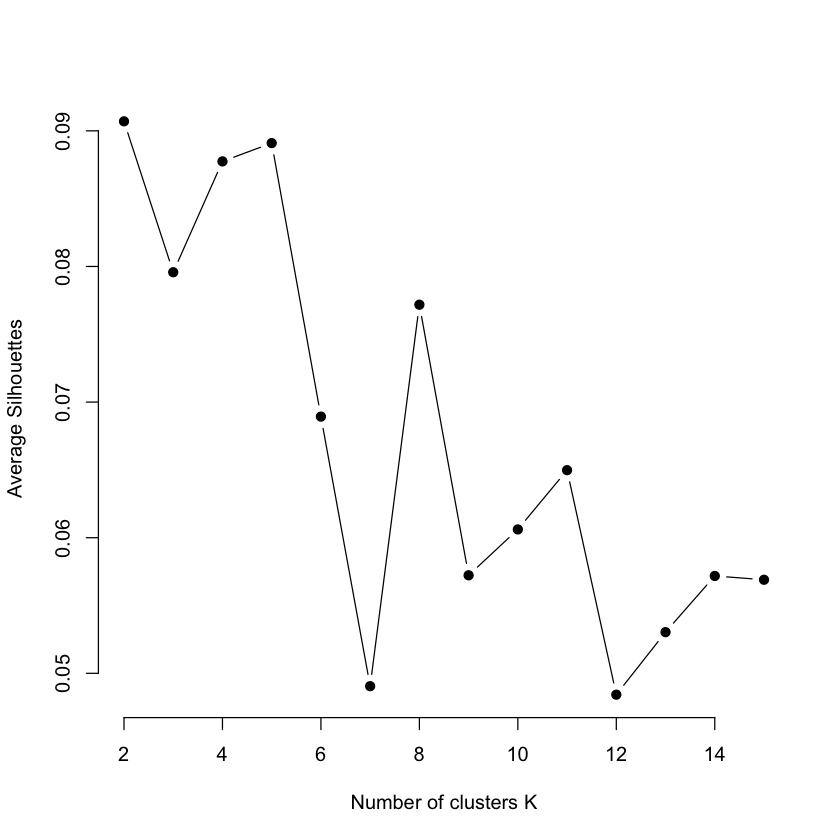

In [94]:
# function to compute average silhouette for k clusters
avg_sil <- function(k) {
  km.res <- kmeans(X.mice.scaled, centers = k, nstart = 25)
  ss <- silhouette(km.res$cluster, dist(X.mice.scaled))
  mean(ss[, 3])
}

# Compute and plot wss for k = 2 to k = 15
k.values <- 2:15

# extract avg silhouette for 2-15 clusters
avg_sil_values <- map_dbl(k.values, avg_sil)

plot(k.values, avg_sil_values,
       type = "b", pch = 19, frame = FALSE, 
       xlab = "Number of clusters K",
       ylab = "Average Silhouettes")

In [99]:
gap_stat <- clusGap(X.mice.scaled, kmeans,nstart = 25,
                    K.max = 10, B = 50)


Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 itera

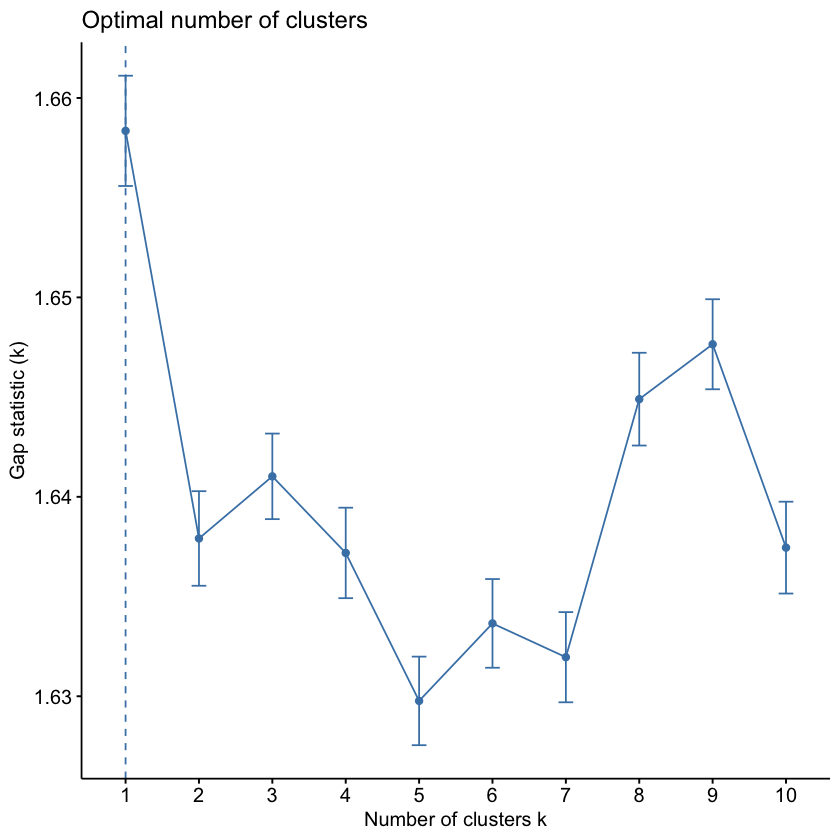

In [100]:
fviz_gap_stat(gap_stat)

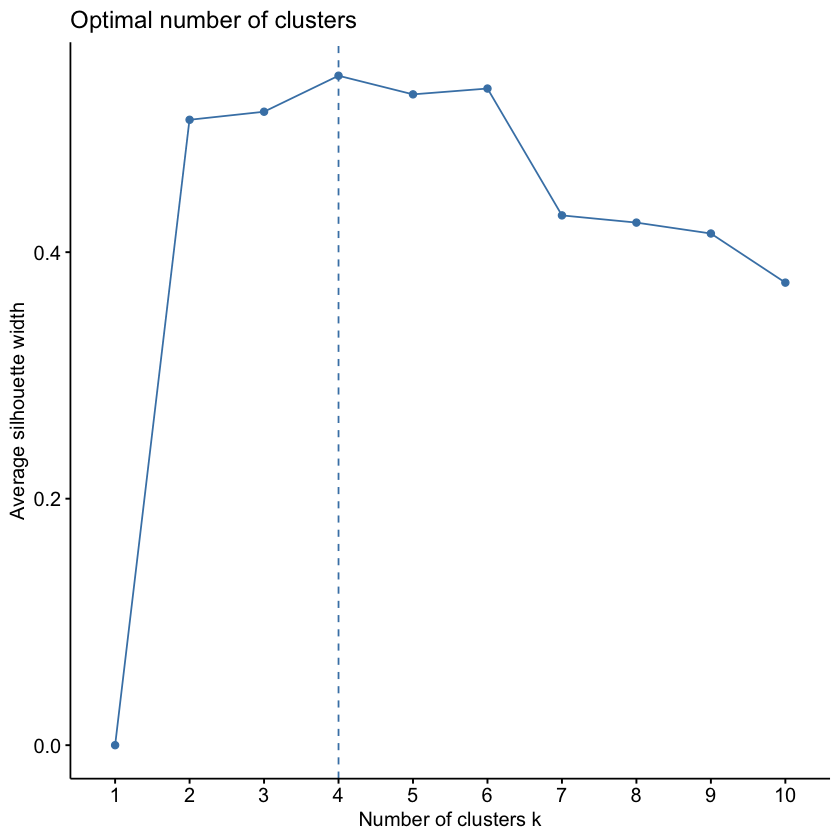

In [91]:
fviz_nbclust(X.mice, hcut, method = "silhouette")

In [69]:
hc4 <- diana(d)

In [70]:
hc4$dc

[1] 0.9261562

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [72]:
fviz_nbclust(Xi.mice.scaled, FUN = hcut, method = "silhouette")

ERROR: Error in fviz_nbclust(Xi.mice.scaled, FUN = hcut, method = "silhouette"): could not find function "fviz_nbclust"


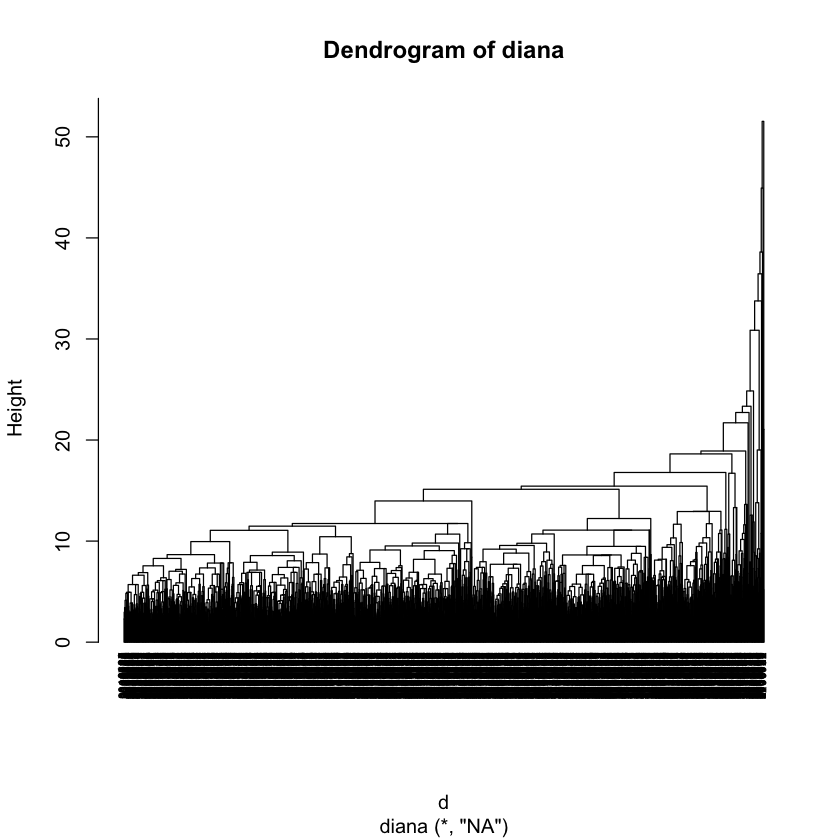

In [31]:
# methods to assess
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

# function to compute coefficient
ac <- function(x) {
  agnes(X.mice.scaled, method = x)$ac
}

map_dbl(m, ac)
##   average    single  complete      ward 
## 0.7379371 0.6276128 0.8531583 0.9346210

average    single  complete      ward 
0.9088971 0.9049852 0.9327457 0.9534210

In [32]:
ac$ward

ERROR: Error in eval(expr, envir, enclos): object 'hc' not found


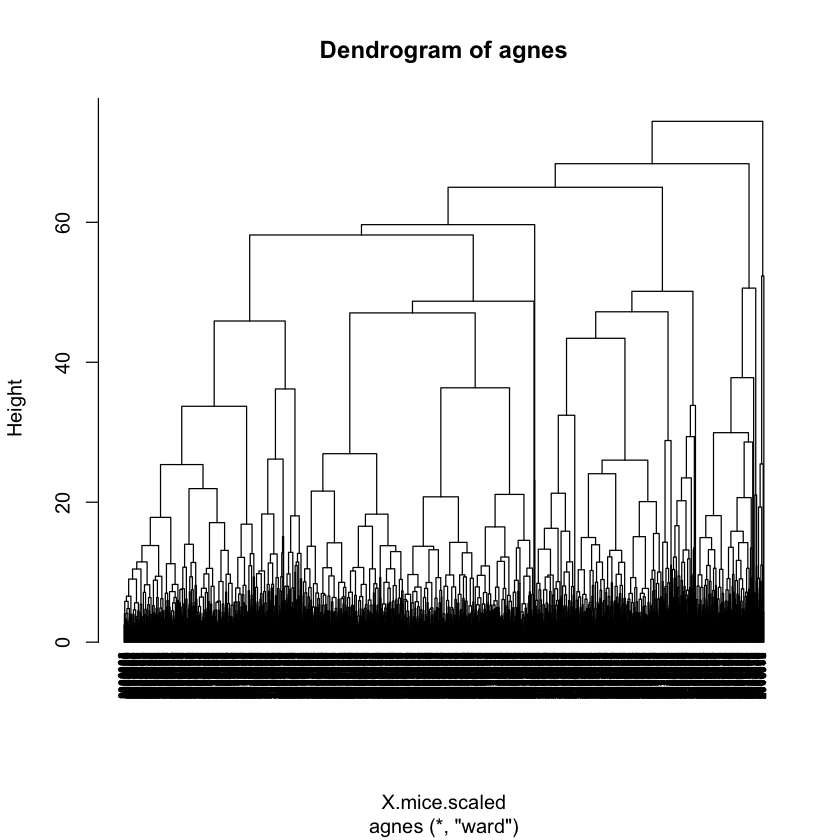

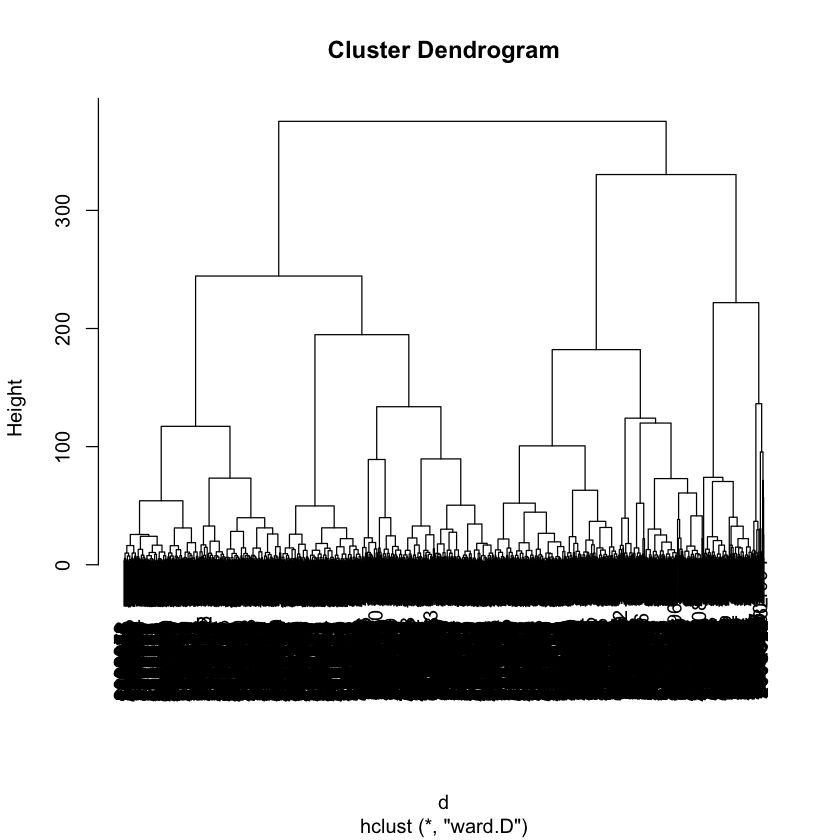

In [22]:
connectivity(

In [5]:
hclusta

function (d, method = "complete", members = NULL) 
{
    METHODS <- c("ward.D", "single", "complete", "average", "mcquitty", 
        "median", "centroid", "ward.D2")
    if (method == "ward") {
        message("The \"ward\" method has been renamed to \"ward.D\"; note new \"ward.D2\"")
        method <- "ward.D"
    }
    i.meth <- pmatch(method, METHODS)
    if (is.na(i.meth)) 
        stop("invalid clustering method", paste("", method))
    if (i.meth == -1) 
        stop("ambiguous clustering method", paste("", method))
    n <- as.integer(attr(d, "Size"))
    if (is.null(n)) 
        stop("invalid dissimilarities")
    if (is.na(n) || n > 65536L) 
        stop("size cannot be NA nor exceed 65536")
    if (n < 2) 
        stop("must have n >= 2 objects to cluster")
    len <- as.integer(n * (n - 1)/2)
    if (length(d) != len) 
        (if (length(d) < len) 
            stop
        else warning)("dissimilarities of improper length")
    if (is.null(members)) 
        members <- rep(1, n)
    else if (length(members) != n) 
        stop("invalid length of members")
    storage.mode(d) <- "double"
    hcl <- .Fortran(C_hclust, n = n, len = len, method = as.integer(i.meth), 
        ia = integer(n), ib = integer(n), crit = double(n), members = as.double(members), 
        nn = integer(n), disnn = double(n), diss = d)
    hcass <- .Fortran(C_hcass2, n = n, ia = hcl$ia, ib = hcl$ib, 
        order = integer(n), iia = integer(n), iib = integer(n))
    structure(list(merge = cbind(hcass$iia[1L:(n - 1)], hcass$iib[1L:(n - 
        1)]), height = hcl$crit[1L:(n - 1)], order = hcass$order, 
        labels = attr(d, "Labels"), method = METHODS[i.meth], 
        call = match.call(), dist.method = attr(d, "method")), 
        class = "hclust")
}
<bytecode: 0x7fee779d5c68>
<environment: namespace:stats>

### Old. Consensus Cluster Plus w/ KNN Imputation
---


In [7]:
out.dir <- "data/clustering/knn_qvars_01"

In [8]:
X.knn <- read.table("data/imputed/knn_qvars_01.tsv", sep="\t", header=T)
X.knn.scaled <- scale(complete(X.knn))

In [9]:
ccp.knn = ConsensusClusterPlus(
    as.matrix(t(X.knn.scaled)),
    maxK=maxK,
    reps=reps,
    pItem=pItem,
    pFeature=pFeature,
    clusterAlg="hc",
    distance="spearman",
    title=out.dir,
    seed=123,
    plot="png"
)

end fraction

clustered

clustered

clustered

clustered

clustered



In [10]:
icl = calcICL(ccp.knn, title=out.dir, plot="png")
write.table(icl[["itemConsensus"]], file.path(out.dir, "item_consensus.tsv"), sep='\t')
write.table(icl[["clusterConsensus"]], file.path(out.dir, "cc_result.tsv"), sep='\t')

saveRDS(ccp.knn, file = file.path(out.dir, "ccp.rds"))

ERROR: Error in cci[, "item"] <- names(res[[2]]$consensusClass)[cci[, "item"]]: number of items to replace is not a multiple of replacement length


### 3. MC3
---